Another look at CODAR baroclinc tides, but focusing on the inclination and phase.

Comparing the baroclinic and barotropic ellipses.

Barotropic ellipses are found with the depth averaged currents. Depth averaging is performed over the entire water column.

Both barotropic and baroclinic were calcualted using a now cast time series Nov 26, 2014- April 26, 2015

In [77]:
import cmath
import datetime
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse
import numpy as np
import scipy.io as sio
import netCDF4 as nc

from salishsea_tools.nowcast import (research_VENUS)
from salishsea_tools import viz_tools

import baroclinic as bc

%matplotlib inline

##Load data

In [41]:
#baroclinic structure
data =sio.loadmat('/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_baroclinic_20141126_20150426.mat')
bc_struc = data['datastruc']
lats = bc_struc['lats'][0,0]
lons = bc_struc['lons'][0,0]

depths = bc_struc['depth'][0,0]

#bartropic structure
data= sio.loadmat('/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_depav_20141126_20150426.mat')
bt_struc = data['datastruc']

#full current - surface
data= sio.loadmat('/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_surface_20141126_20150426.mat')
surface_struc = data['datastruc']

grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
SITES = research_VENUS.SITES['VENUS']

#Full Ellipses

In [42]:
def plot_ellipse(lon, lat, inc, major, minor, ax, scale):
    """Plot a tidal ellipse at lon, lat given byt the inclination, 
    major and minor axis. The ellipse is plotted in ax with scale"""
    if minor > 0:
        thecolor = 'r'
    else:
        thecolor = 'b'
    ellsc = Ellipse(xy=(lon, lat),
                width=scale * major,
                height=scale * minor,
                angle=inc,
                color=thecolor)
    ax.add_artist(ellsc)

In [69]:
def plot_CODAR_ellipse(ax,lons, lats, const, datastruc, step=3, scale=0.08, baroclinic=False, depth_level=0,
                      barotropic = False, isobaths=[5,20]):
    """Plot ellipses over the CODAR region"""
        
    major, minor, pha, inc = bc.get_constituent(const, datastruc)
    if baroclinic:
        major = major[:,:,depth_level]
        minor = minor[:,:,depth_level]
        inc = inc[:,:,depth_level]
        title_str = 'baroclinic {0:.3g} m'.format(depths[depth_level][0])
    elif barotropic:
        title_str = 'barotropic'
    else:
        title_str = 'surface'
    
    for i in np.arange(0, lons.shape[-1], step):
        for j in np.arange(0, lats.shape[-1], step):
            if major[i,j]:
                plot_ellipse(lons[i, j], lats[i, j], inc[i, j],
                             major[i, j],
                             minor[i, j], ax, scale)
    #Add scale ellipse
    ell = Ellipse(xy=(lons[0,0]-.1,lats[0,0]-.01),width = scale*0.5, height = scale*0.5, angle = 45,
                  color='g')
    ax.add_artist(ell)
    textscale = ax.text(lons[0,0]-.18, lats[0,0]+0.01, '0.5 m/s', color='g', fontsize=12, fontweight='heavy')

    ax.set_title('{} {} tidal ellipses'.format(const, title_str))
    
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.05, lats[-1,-1]+0.01])
    ax.set_ylabel('Latitude (degrees N)')
    ax.set_xlabel('Longitude (degrees W)')

    viz_tools.plot_land_mask(ax, grid, coords='map')
    for isobath in isobaths:
        viz_tools.plot_coastline(ax, grid, coords='map', isobath=isobath)
    viz_tools.set_aspect(ax)
    

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


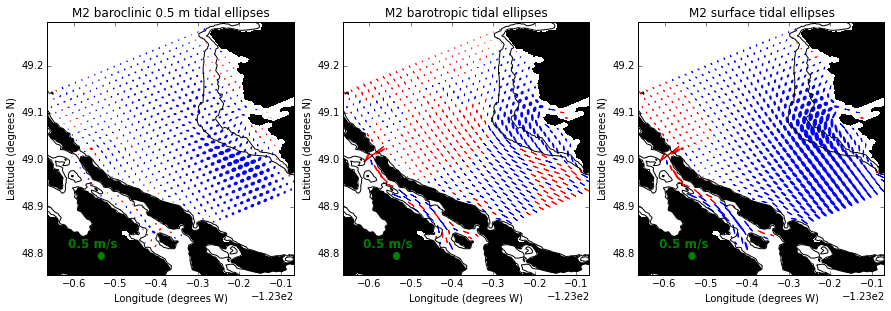

In [70]:
fig,axs = plt.subplots(1,3,figsize=(15,8))
const='M2'
sc=0.03
plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0, scale=sc)
plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, scale=sc, barotropic=True)
plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, scale=sc)

* Over the banks, the baroclinic ellipses are a lot smaller than the barotropic. Is that mostly because of the depth averaging? If the currents are primarily barotropic here, then ubc= u -udepav will be very small. But how can they be barotropic when this is where the river feeds into the domain? But it is also so shallow here. 

* Is the large increase in the baroclinic major/minor axis over the slopes an artifact of this depth averaging? Is it too shallow here to do the depth avergaing without ignoring the boundary layer? Then why don't we see very large currents on the northwest side of the slopes?

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


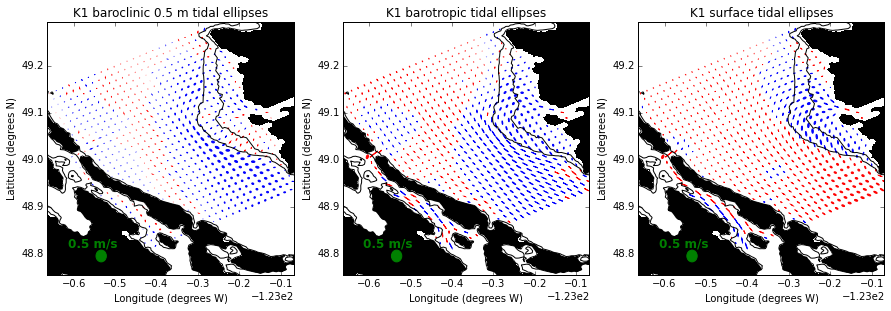

In [71]:
fig,axs = plt.subplots(1,3,figsize=(15,8))
const='K1'
sc=0.05
plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0, scale=sc)
plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, scale=sc, barotropic=True)
plot_CODAR_ellipse(axs[2],lons, lats, const, surface_struc, scale=sc)

## M2 at 98m

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


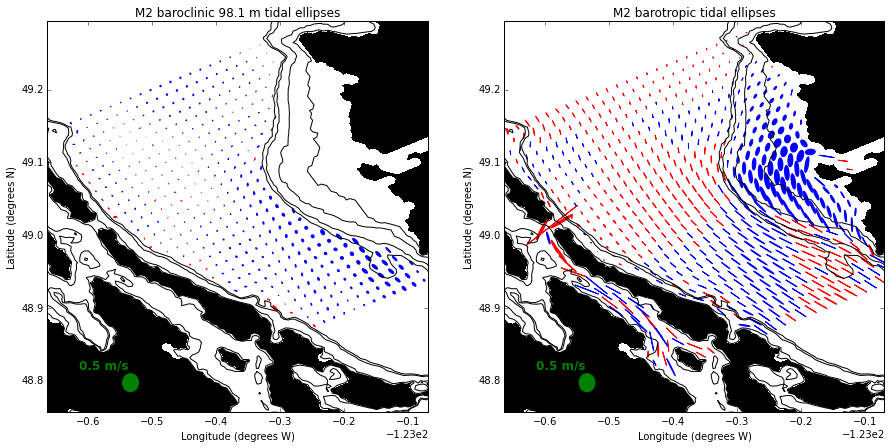

In [72]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
isobaths=[5,20,90, 110]
sc=0.05
plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=26, scale=sc, isobaths=isobaths)
plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, scale=sc, isobaths=isobaths, barotropic=True)

##M2 147m

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


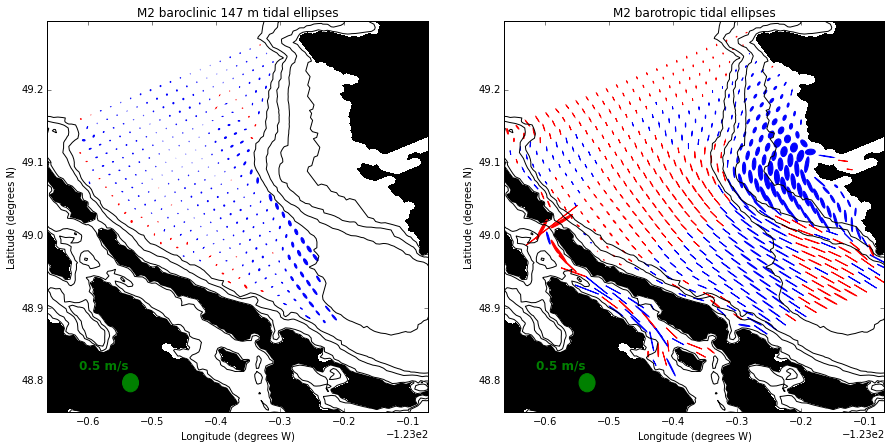

In [74]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
isobaths=[5,20,90, 140]
sc=0.05
plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=28, scale=sc, isobaths=isobaths)
plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, scale=sc, isobaths=isobaths, barotropic=True)

#Phase
An attempt at comparing the baroclinic and barotropic phase

In [75]:
def plot_phase(ax, lons, lats, const, datastruc, baroclinic=False, depth_level = 0):
    """Plot the phase stored in a matalb datastruc"""
    major, minor, pha, inc = bc.get_constituent(const, datastruc)
    if baroclinic:
        pha = pha[:,:,depth_level]
        title_str = 'baroclinic {0:.3g} m'.format(depths[depth_level][0])
    else:
        title_str = 'barotropic'
        
    mesh=ax.pcolormesh(lons, lats, pha, vmin=0, vmax=360, cmap = 'hsv')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('Phase (deg wrt GMT)')
    
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.1, lats[-1,-1]+0.04])
    ax.set_ylabel('Latitude (degrees N)')
    ax.set_xlabel('Longitude (degrees W)')
    
    viz_tools.plot_land_mask(ax, grid, coords='map')
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=5)
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=20)
    viz_tools.set_aspect(ax)
    
    ax.set_title('{} {} phase'.format(const, title_str))

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


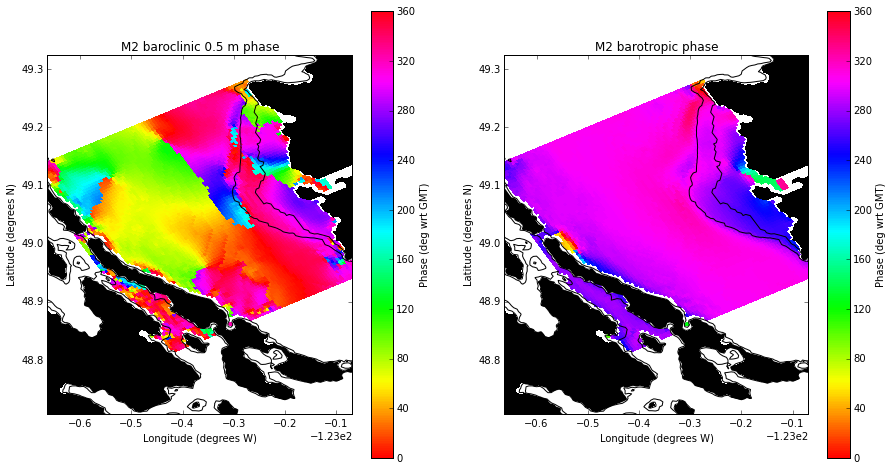

In [76]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
plot_phase(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0)
plot_phase(axs[1],lons, lats, const, bt_struc)

The large baroclinic phase discontinuity (green area) is about 180 and results from a 180 deg shift in the inclination.  Over the banks, the baroclinic phase is delayed when compared to the baroptropic phase. But, the barotopic and baroclinic currents are also in very different directions.

Idea - rotate baroclinic ellipse onto the barotropic major/minor axis. Look at the phase aligned with the barotropic major axis.

Question - is it that our baroclinic and barotropic currents are in phase or that the baroclinic ellipses are just really circular and so are likely to interfere with the barotropic currents no matter what. The barotopic ellipses are mostly rectilinear. 


###Rotation

Given orthogonal velocity components $u=A_u\cos(\omega t - \phi_u)$ and $v=A_v\cos(\omega t - \phi_v)$, we can rotate clockwise by $\theta$ to define 

$\tilde{u} = u\cos\theta + v \sin\theta$

$\tilde{v} = -u\sin\theta + v\cos\theta$.

Given we know $\phi_{u}, A_{u}, \phi_{v}, A_{v}$, we would like to find $\phi_{\tilde{u}}, A_{\tilde{u}}, \phi_{\tilde{v}}, A_{\tilde{v}} $ such that

$\tilde{u} = A_{\tilde{u}}\cos(\omega t - \phi_{\tilde{u}})$ and 

$\tilde{v} = A_{\tilde{v}}\cos(\omega t - \phi_{\tilde{v}})$.

The unknown quantities can be determined using complex algebra:

$A_{\tilde{u}}e^{i(\omega t - \phi_{\tilde{u}})}= A_ue^{i(\omega t - \phi_u)}\cos\theta+ A_ve^{i(\omega t - \phi_v)}\sin\theta $

$A_{\tilde{v}}e^{i(\omega t - \phi_{\tilde{v}})}= -A_ue^{i(\omega t - \phi_u)}\sin\theta+ A_ve^{i(\omega t - \phi_v)}\cos\theta $,

leading to

$A_{\tilde{u}} = |  A_ue^{i\phi_u}\cos\theta + A_ve^{i\phi_v}\sin\theta |$

$\phi_{\tilde{u}} = arg(A_ue^{i\phi_u}\cos\theta + A_ve^{i\phi_v}\sin\theta)$

$A_{\tilde{v}} = |  -A_ue^{i\phi_u}\sin\theta+ A_ve^{i\phi_v}\cos\theta |$

$\phi_{\tilde{v}} = arg(-A_ue^{i\phi_u}\sin\theta+ A_ve^{i\phi_v}\cos\theta )$

This allows me to rotate the baroclinic ellipses onto the major axis of the barotropic ellipses. Then I can calculate the for the baroclinic current aligned in the barotropic major axis.

Question - how do i deal with a negative minor axis? Does that matter?

In [102]:
def rotate_baroclinc(bc_struc, bt_struc, const):
    """Rotate the baroclinc ellipse onto the barotropic major/minor axis"""
    
    major_bt, minor_bt, pha_bt, inc_bt = bc.get_constituent(const, bt_struc)
    major_bc, minor_bc, pha_bc, inc_bc = bc.get_constituent(const, bc_struc)
    
    # rotation angle is the difference between baroclinic and barotropic inclinations
    # construct complex representation of rotated velocities
    inc_diff = np.deg2rad(inc_bc -np.expand_dims(inc_bt,2))
    pha_bc = np.deg2rad(pha_bc)
    # Complex representation of the rotated major
    rotated_major_complex = (major_bc*np.cos(inc_diff)*np.exp(1j*pha_bc) +
                             minor_bc*np.sin(inc_diff)*np.exp(1j*(pha_bc+np.pi/2)))
    rotated_major_phase = np.angle(rotated_major_complex)
    rotated_major_amp = np.abs(rotated_major_complex)
    #C omplex representation of the rotated minor
    rotated_minor_complex = (-major_bc*np.sin(inc_diff)*np.exp(1j*pha_bc) +
                             minor_bc*np.cos(inc_diff)*np.exp(1j*(pha_bc+np.pi/2)))
    rotated_minor_phase = np.angle(rotated_minor_complex)
    rotated_minor_amp = np.abs(rotated_minor_complex)
    # Conversion to degrees
    rotated_minor_phase = np.rad2deg(rotated_minor_phase)
    rotated_major_phase = np.rad2deg(rotated_major_phase)
    # Force phase between 0 and 360
    rotated_minor_phase=rotated_minor_phase + 360*(rotated_minor_phase<0)
    rotated_major_phase=rotated_major_phase + 360*(rotated_major_phase<0)
    
    return rotated_major_phase, rotated_major_amp, rotated_minor_phase, rotated_minor_amp

In [103]:
major_bt, minor_bt, pha_bt, inc_bt = bc.get_constituent('M2', bt_struc)

maj_pha, maj_amp, min_pha, min_amp  = rotate_baroclinc(bc_struc, bt_struc, 'M2')

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):


(48.706606292724608, 49.323939361572265)

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


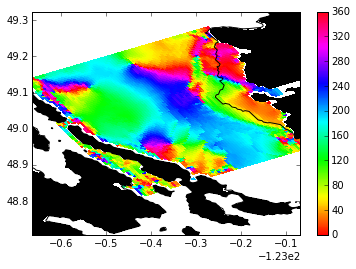

In [105]:
fig, ax=plt.subplots(1,1)
phase_diff = maj_pha[:,:,0]-pha_bt
phase_diff = phase_diff + 360*(phase_diff<0)
mesh = ax.pcolormesh(lons, lats,phase_diff,cmap='hsv')
plt.colorbar(mesh, ax=ax)
viz_tools.plot_land_mask(ax,grid, coords='map')
viz_tools.plot_coastline(ax,grid, coords='map', isobath=5)
ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
ax.set_ylim([lats[0,0]-0.1, lats[-1,-1]+0.04])

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


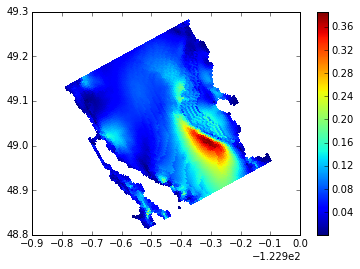

In [106]:
plt.pcolormesh(lons, lats, maj_amp[:,:,0])
plt.colorbar()

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


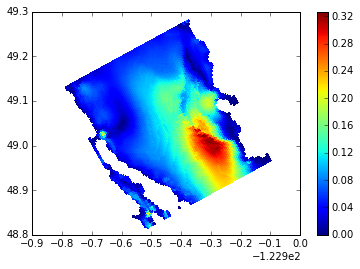

In [107]:
plt.pcolormesh(lons, lats, min_amp[:,:,0])
plt.colorbar()